In [0]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
print(tf.__version__)

2.1.0-rc1


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My Drive/Colab Notebooks/tensorflow

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks/tensorflow


In [0]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

MessageError: ignored

In [0]:
!ls

In [0]:
df = pd.read_csv("moore.csv",header=None).values


In [0]:
X = df[:,0].reshape(-1,1) #making 2d array of NxD where D = 1
N,D = X.shape
Y = df[:,1]

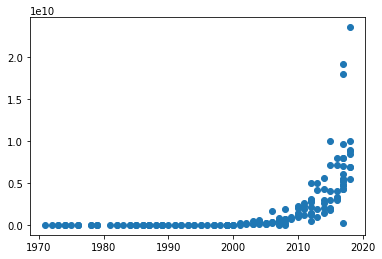

In [0]:
plt.scatter(X,Y)

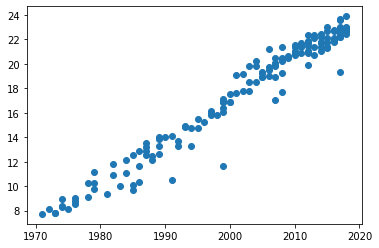

In [0]:
Y = np.log(Y)
plt.scatter(X, Y)

In [0]:
#centering around 0
#could scale but have to reverse transform later
X = X - X.mean()

In [0]:
#model
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Input(shape=(1,)),
                                    tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(0.001,0.9), loss="mse")

In [0]:
#learning rate scheduler
def schedule(epoch, lr):
  if epoch >=50:
    return 0.001
  return 0.001

In [0]:
scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [0]:
#train the model
r = model.fit(x=X, y=Y,epochs=200,callbacks=[scheduler])

Train on 162 samples
Epoch 1/200
162/162 [==============================] - 0s 3ms/sample - loss: 468.4588
Epoch 2/200
162/162 [==============================] - 0s 73us/sample - loss: 547.6233
Epoch 3/200
162/162 [==============================] - 0s 71us/sample - loss: 528.0800
Epoch 4/200
162/162 [==============================] - 0s 77us/sample - loss: 254.8852
Epoch 5/200
162/162 [==============================] - 0s 75us/sample - loss: 206.2053
Epoch 6/200
162/162 [==============================] - 0s 72us/sample - loss: 278.2994
Epoch 7/200
162/162 [==============================] - 0s 72us/sample - loss: 175.1467
Epoch 8/200
162/162 [==============================] - 0s 84us/sample - loss: 118.0267
Epoch 9/200
162/162 [==============================] - 0s 76us/sample - loss: 67.0312
Epoch 10/200
162/162 [==============================] - 0s 74us/sample - loss: 43.8421
Epoch 11/200
162/162 [==============================] - 0s 77us/sample - loss: 33.5666
Epoch 12/200
162/162 [==

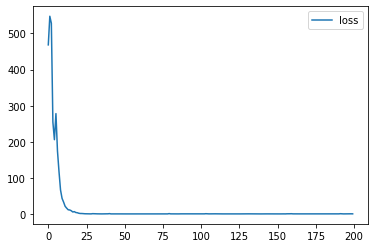

In [0]:
plt.plot(r.history["loss"],label="loss")
plt.legend()

In [0]:
#get weights
print(model.layers)
#the first array represents weight w and second array the bias b
print(model.layers[0].get_weights())

[array([[0.36900958]], dtype=float32), array([17.734526], dtype=float32)]


In [0]:
#slope of the line is
a = model.layers[0].get_weights()[0][0,0]
print(a)

0.36900958


In [0]:
print("Time double = ", np.log(2)/a)

Time double =  1.8783988553694035


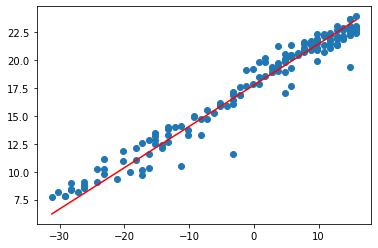

In [0]:
yhat = model.predict(X).flatten()
plt.scatter(X,Y)
plt.plot(X,yhat,color="red")